<a href="https://colab.research.google.com/github/pragati3635/Twitter-Sentiment-Analysis/blob/main/Project_B19EE043_B19EE022_B19CSE065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMPORTING*** ***LIBRARIES***

In [ ]:
# Data Frame 
import pandas as pd
import numpy as np
import re

#plotting
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

#nltk
import nltk 
import warnings 
import string
warnings.filterwarnings("ignore", category=DeprecationWarning)

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import cross_val_score 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import Perceptron

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


***LOADING*** ***DATASET***

In [ ]:
#data =  pd.read_csv('/content/MLproject file.csv',encoding='latin', names = ['polarity','id','date','query','user','text']) 
data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text']) 
data 

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
#test cases
test_cases =  pd.read_csv('/content/Testtttt.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])
test_cases.head(5)

,polarity,id,date,query,user,text
17457,0,2328760051,Thu Jun 25 09:57:37 PDT 2009,NO_QUERY,CBrittMaria,aww farrah passed away
18012,0,2328967363,Thu Jun 25 10:11:43 PDT 2009,NO_QUERY,NoNamesJustLo,If I had the funds I would get up and runaway ...
17948,0,2328946605,Thu Jun 25 10:10:17 PDT 2009,NO_QUERY,Leanne01,Rest in Peace Farrah
7086,0,2325154716,Thu Jun 25 04:53:09 PDT 2009,NO_QUERY,missrenne,"@maialee @Change_for_Iran has tweeted again, t..."
15511,0,2327965269,Thu Jun 25 09:00:23 PDT 2009,NO_QUERY,nechell89,@SilkDark i dont know because I got it through...


In [ ]:
test_cases.shape 

(1000, 6)

In [ ]:
data = data.sample(frac=1)
data = data[:200000]   

***DATA*** ***VISUALIZATION***

In [ ]:
print("Dataset shape:", data.shape) 

Dataset shape: (200000, 6)


In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1007809 to 799405
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  200000 non-null  int64 
 1   id        200000 non-null  int64 
 2   date      200000 non-null  object
 3   query     200000 non-null  object
 4   user      200000 non-null  object
 5   text      200000 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.7+ MB


In [ ]:
data.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,1.999020,1.998734e+09
std,2.000005,1.939366e+08
min,0.000000,1.467813e+09
25%,0.000000,1.956862e+09
50%,0.000000,2.002152e+09
75%,4.000000,2.177113e+09
max,4.000000,2.329205e+09


In [ ]:
data.polarity.unique()

array([4, 0])

In [ ]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head() 

,polarity,id,date,query,user,text
1007809,1,1880738760,Fri May 22 02:19:34 PDT 2009,NO_QUERY,sueleeBAYbee,Gogol bordello was awesome. really nice night
582610,0,2214675791,Wed Jun 17 17:04:38 PDT 2009,NO_QUERY,honeybc3,@Kaiser_Steele my dh hasnt taken me to a hotel...
171849,0,1963371516,Fri May 29 12:37:21 PDT 2009,NO_QUERY,leighalexander,@theECA i think that violates my noncompete
856347,1,1573734826,Tue Apr 21 02:36:16 PDT 2009,NO_QUERY,keza34,@fudgecrumpet what type of cake ?can i have so...
200879,0,1971772884,Sat May 30 07:51:57 PDT 2009,NO_QUERY,Alyson_Stoner,Can't wait for Camp Rock 2. Hope to see all my...


In [ ]:
test_cases['polarity'] = test_cases['polarity'].replace(4,1)

In [ ]:
data = data.reset_index(drop=True)
data.head() 

,polarity,id,date,query,user,text
0,1,1880738760,Fri May 22 02:19:34 PDT 2009,NO_QUERY,sueleeBAYbee,Gogol bordello was awesome. really nice night
1,0,2214675791,Wed Jun 17 17:04:38 PDT 2009,NO_QUERY,honeybc3,@Kaiser_Steele my dh hasnt taken me to a hotel...
2,0,1963371516,Fri May 29 12:37:21 PDT 2009,NO_QUERY,leighalexander,@theECA i think that violates my noncompete
3,1,1573734826,Tue Apr 21 02:36:16 PDT 2009,NO_QUERY,keza34,@fudgecrumpet what type of cake ?can i have so...
4,0,1971772884,Sat May 30 07:51:57 PDT 2009,NO_QUERY,Alyson_Stoner,Can't wait for Camp Rock 2. Hope to see all my...


In [ ]:
test_cases = test_cases.reset_index(drop=True)

In [ ]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99951
No. of negative tagged sentences is: 100049


In [ ]:
#correlation of the length of a tweet with its polarity
target_0 = []
target_1 = []
for i in range(data.shape[0]):
  if (data['polarity'][i]==1):
    target_1.append(len(data['text'][i]))
  elif (data['polarity'][i]==0):
    target_0.append(len(data['text'][i]))

print(target_0)
print('\n')
print(target_1)

[58, 44, 88, 38, 93, 14, 101, 98, 73, 137, 73, 45, 94, 137, 36, 64, 102, 142, 84, 12, 38, 57, 109, 136, 111, 68, 73, 135, 69, 26, 62, 116, 73, 141, 138, 166, 60, 125, 69, 64, 138, 68, 70, 40, 120, 68, 86, 90, 91, 32, 131, 41, 64, 32, 88, 55, 86, 38, 58, 53, 72, 75, 93, 60, 77, 72, 90, 20, 141, 73, 18, 100, 53, 87, 39, 22, 92, 21, 47, 72, 53, 134, 54, 62, 73, 110, 141, 137, 86, 77, 138, 53, 19, 38, 48, 54, 26, 81, 53, 105, 38, 71, 13, 43, 90, 102, 38, 113, 81, 79, 104, 60, 79, 29, 136, 22, 131, 65, 49, 35, 43, 99, 44, 112, 135, 117, 119, 75, 57, 45, 94, 32, 101, 107, 134, 125, 56, 32, 72, 45, 65, 46, 125, 26, 98, 55, 34, 76, 66, 33, 18, 94, 61, 58, 80, 135, 60, 68, 20, 30, 28, 88, 30, 104, 55, 50, 120, 71, 140, 118, 137, 137, 76, 51, 17, 116, 111, 134, 33, 21, 81, 105, 106, 98, 44, 50, 111, 37, 82, 64, 17, 54, 57, 100, 36, 136, 57, 110, 102, 25, 110, 58, 16, 49, 16, 64, 34, 62, 33, 35, 97, 83, 34, 22, 52, 64, 77, 84, 56, 89, 76, 90, 69, 102, 45, 113, 96, 61, 90, 118, 73, 56, 48, 35, 15,

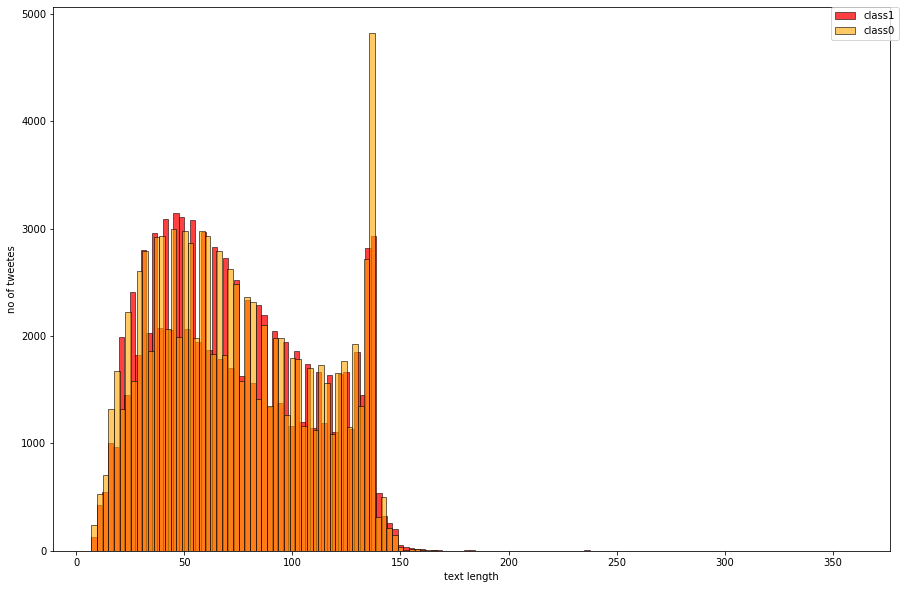

In [ ]:
plt.figure(figsize=(15,10)) 
sns.histplot(data=target_1, color='red', label = "class1").set(xlabel="text length",ylabel = "no of tweetes" )
sns.histplot(data=target_0, color='orange', alpha=0.6, label = "class0").set(xlabel="text length",ylabel = "no of tweetes" )
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0) 
plt.show()

In [ ]:
# get a word count per of text
def word_count(words):
    return len(words.split())

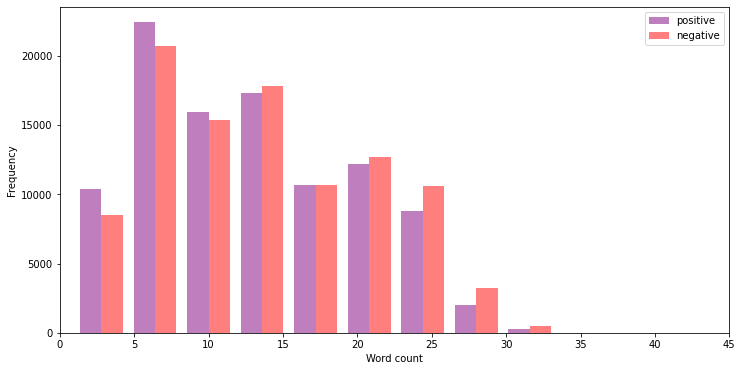

In [ ]:
# plot word count distribution for both positive and negative 
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['purple','red'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

***DATA*** ***PROCESSING***

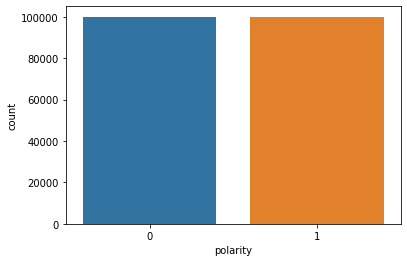

In [ ]:
#Ploting the count for each target
sns.countplot(x = 'polarity', data = data) 

In [ ]:
#converting pandas object to string type
df = data.loc[:,("text",)]
#df = data[["text" , ]]
df["text"] = df["text"].astype(str)
df.head()

,text
0,Gogol bordello was awesome. really nice night
1,@Kaiser_Steele my dh hasnt taken me to a hotel...
2,@theECA i think that violates my noncompete
3,@fudgecrumpet what type of cake ?can i have so...
4,Can't wait for Camp Rock 2. Hope to see all my...


In [ ]:
test_cases_x = test_cases.loc[:,("text",)] 
test_cases_x["text"] = test_cases_x["text"].astype(str)

In [ ]:
# number of null values in each column
for i in data:
    print(i,"=",data[i].isnull().sum()) 

polarity = 0
id = 0
date = 0
query = 0
user = 0
text = 0
word count = 0


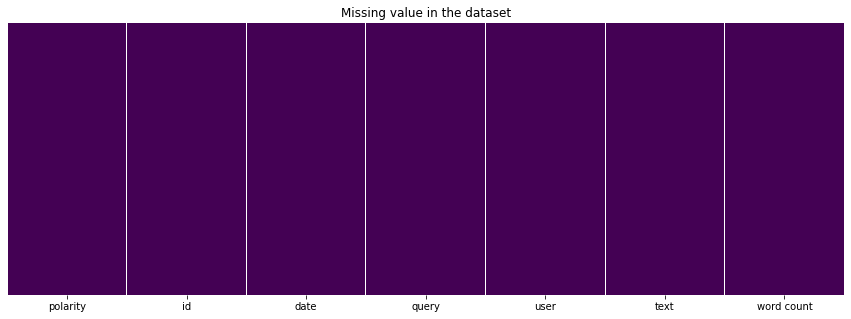

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [ ]:
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1

In [ ]:
import re
def remove_doublespace(text):       
  return  re.sub(' +',' ',text)

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

n_rare_words = 20
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:

df["text_processed"] = df.loc[:,("text")].str.lower()
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_doublespace(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_urls(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_punctuation(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_stopwords(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_freqwords(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_rarewords(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: lemmatize_words(text))
df["text_processed"] = df.loc[:,("text_processed")].apply(lambda text: remove_emoji(text))


In [ ]:
test_cases_x["text_processed"] = test_cases_x.loc[:,("text")].str.lower()
test_cases_x["text_processed"] = test_cases_x.loc[:,("text_processed")].apply(lambda text: remove_doublespace(text))
test_cases_x["text_processed"] = test_cases_x.loc[:,("text_processed")].apply(lambda text: remove_urls(text))
test_cases_x["text_processed"] = test_cases_x.loc[:,("text_processed")].apply(lambda text: remove_punctuation(text))
test_cases_x["text_processed"] = test_cases_x.loc[:,("text_processed")].apply(lambda text: remove_stopwords(text))
test_cases_x["text_processed"] = test_cases_x.loc[:,("text_processed")].apply(lambda text: remove_freqwords(text))
test_cases_x["text_processed"] = test_cases_x.loc[:,("text_processed")].apply(lambda text: remove_rarewords(text))
test_cases_x["text_processed"] = test_cases_x.loc[:,("text_processed")].apply(lambda text: lemmatize_words(text))
test_cases_x["text_processed"] = test_cases_x.loc[:,("text_processed")].apply(lambda text: remove_emoji(text))

In [ ]:
df.head()

,text,text_processed
0,Gogol bordello was awesome. really nice night,gogol bordello awesome really nice night
1,@Kaiser_Steele my dh hasnt taken me to a hotel...,kaisersteele dh hasnt take hotel 7 year
2,@theECA i think that violates my noncompete,theeca think violate noncompete
3,@fudgecrumpet what type of cake ?can i have so...,fudgecrumpet type cake somelol
4,Can't wait for Camp Rock 2. Hope to see all my...,cant wait camp rock 2 hope see friend soon mis...


In [ ]:
data["text_processed"] = df["text_processed"]
posTGT_df = data[data.polarity == 1]
negTGT_df = data[data.polarity == 0]
Pos_tgt_text = " ".join(review for review in posTGT_df.text_processed.astype(str))

Neg_tgt_text = " ".join(review for review in negTGT_df.text_processed.astype(str))

print(data)

        polarity  ...                                     text_processed
0              1  ...           gogol bordello awesome really nice night
1              0  ...            kaisersteele dh hasnt take hotel 7 year
2              0  ...                    theeca think violate noncompete
3              1  ...                     fudgecrumpet type cake somelol
4              0  ...  cant wait camp rock 2 hope see friend soon mis...
...          ...  ...                                                ...
199995         1  ...                say sleepless friday night saturday
199996         0  ...  repressd well recent time happen eaten banana ...
199997         0  ...                  barraganc file choose open appear
199998         0  ...           cleavleand lose susan boyle lose okaaaay
199999         0  ...           whancock lose please help find good home

[200000 rows x 8 columns]


In [ ]:
test_cases["text_processed"] = test_cases_x["text_processed"]

In [ ]:
#count of unique words
words = []
words_class0 = []
words_class1 = [] 
for i in range(len(data['text_processed'])):
    for j in data['text_processed'][i].split():
        words.append(j)
        if data['polarity'][i]==0:
            words_class0.append(j)
        elif data['polarity'][i]==1:
            words_class1.append(j)
words_unique = set(words)
words_unique 


{'sammyistheshizz',
 'lovesim',
 'cspan',
 'theswellseason',
 'dimior',
 'coolwhy',
 'ä\x91á»c',
 'roxeh',
 '3afraaa',
 'rampart',
 'redquot',
 'sharonginelle',
 'salfordrules',
 'isolated',
 'macyfouse',
 'rohnert',
 'graciegirla23',
 'matin',
 'notorious',
 'workrevision',
 'todayfinished',
 'eaa730',
 'fookin',
 'visualrinse',
 'shouldsince',
 'replymessage',
 'volverte',
 'coronadocookie',
 'sameoh',
 'ddlovatofan314',
 'monicai',
 'gotsta',
 'east',
 'omgitzsaraa',
 'worker',
 'sicklolx',
 'bloggerquot',
 'pinkpinksuzie',
 'charitytuesday',
 'ooc',
 'joshunfried',
 'bs76',
 'psid',
 'canwegotothezoo',
 'gregorybodnar',
 'twave',
 'mattthewhoare',
 'jinxcat',
 'quottweetsquot',
 'reuben',
 'xxxxxxxx',
 'ninamaluhia',
 'viruis',
 'shish',
 'clientyeah',
 'jbillingsley',
 'techo',
 'pbs',
 'jamieaiken919',
 'magento',
 'itsnikole',
 'cacaubrazil',
 'pikachou',
 'alexxandraftw',
 'crackeronly',
 'jjuuddggee',
 'gamelast',
 'barkaloungers',
 'prettyjoni',
 'wistfully',
 'sharvegas',
 '

In [ ]:
print("Number of Unique words are",len(words_unique)) 

Number of Unique words are 171083


***Analyzing*** ***The*** ***Data***

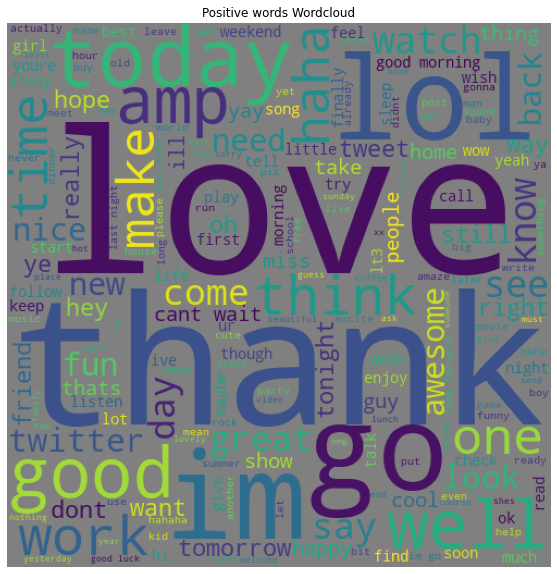

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.title('Positive words Wordcloud')
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='grey', random_state=10).generate(Pos_tgt_text)
plot_cloud(wordcloud)


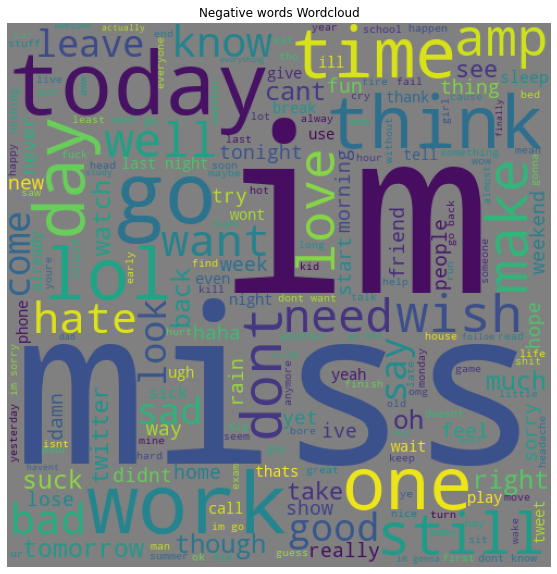

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.title('Negative words Wordcloud')
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='grey', random_state=10).generate(Neg_tgt_text)
plot_cloud(wordcloud)


***Vectorization*** ***and*** ***Splitting*** ***the*** ***Data*** 

In [ ]:
X = data['text_processed'].values 
y = data['polarity'].values 

In [ ]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X) 
print('Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  170250


In [ ]:
X_tc = test_cases['text_processed'].values 
y_tc = test_cases['polarity'].values
test_vectors  = vector.transform(X_tc)

***Split*** ***Train*** ***and*** ***Test***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=101)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print() 
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 170250)
y_train (160000,)

X_test (40000, 170250)
y_test (40000,)


***MODEL*** ***BUILDING***

***Logistic*** ***Regression*** ***Model***

In [ ]:

LR = LogisticRegression(max_iter =500)
LR_model=LR.fit(X_train, y_train)

acc_train=LR_model.score(X_train, y_train)
acc_test=LR_model.score(X_test, y_test)
cvs_LR = cross_val_score(LR_model, X, y, cv=5) 

print("Accuracy of LR_Model with Cross Validation is:",cvs_LR.mean() * 100) 
print('Accuracy of Logistic Regression Model on training data : {}'.format(acc_train*100))
print('Accuracy of Logistic Regression Model on testing data : {} \n'.format(acc_test*100))


Accuracy of LR_Model with Cross Validation is: 76.8785
Accuracy of Logistic Regression Model on training data : 83.089375
Accuracy of Logistic Regression Model on testing data : 76.9425 



              precision    recall  f1-score   support

           0    0.78575   0.73949   0.76192     19957
           1    0.75497   0.79923   0.77647     20043

    accuracy                        0.76943     40000
   macro avg    0.77036   0.76936   0.76920     40000
weighted avg    0.77033   0.76943   0.76921     40000



Text(0.5, 1.0, 'Confusion Matrix')

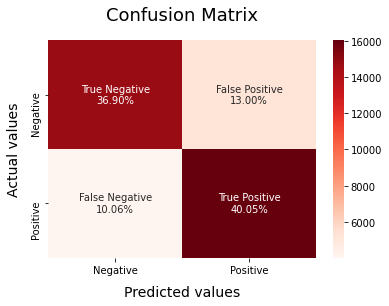

In [ ]:

y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,  digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '', xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


In [ ]:
y_pred_lr = LR_model.predict(test_vectors)
test_cases["LR_PRED"]=y_pred_lr 

***Random*** ***Forest*** ***Model***

In [ ]:

Rf = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth=50)
Rf_model=Rf.fit(X_train, y_train)

acc_train=Rf_model.score(X_train, y_train)
acc_test=Rf_model.score(X_test, y_test)
cvs_Rf = cross_val_score(Rf_model, X, y, cv=5)

print("Accuracy of Rf_Model with Cross Validation is:",cvs_Rf.mean() * 100)  
print('Accuracy of Random Forest Model on training data : {}'.format(acc_train*100))
print('Accuracy of Random Forest Model on testing data : {} \n'.format(acc_test*100))


Accuracy of Rf_Model with Cross Validation is: 73.38850000000001
Accuracy of Random Forest Model on training data : 79.35875
Accuracy of Random Forest Model on testing data : 73.41499999999999 



              precision    recall  f1-score   support

           0    0.76160   0.68001   0.71850     19957
           1    0.71210   0.78806   0.74815     20043

    accuracy                        0.73415     40000
   macro avg    0.73685   0.73403   0.73333     40000
weighted avg    0.73680   0.73415   0.73336     40000



Text(0.5, 1.0, 'Confusion Matrix')

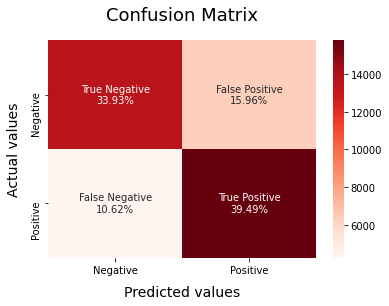

In [ ]:

y_pred = Rf_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,  digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '', xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


In [ ]:
y_pred_rf = Rf_model.predict(test_vectors)
test_cases["RF_PRED"]=y_pred_rf

***Naive*** ***Bayes***

In [ ]:

mnb = MultinomialNB()
mnb_model=mnb.fit(X_train, y_train)

acc_train=mnb_model.score(X_train, y_train)
acc_test=mnb_model.score(X_test, y_test)
cvs_mnb = cross_val_score(mnb_model, X, y, cv=5) 

print("Accuracy of mnb_Model with Cross Validation is:",cvs_mnb.mean() * 100)  
print('Accuracy of Multinomial Naive Bayes Model on training data : {}'.format(acc_train*100))
print('Accuracy of Multinomial Naive Bayes Model on testing data : {} \n'.format(acc_test*100))


Accuracy of mnb_Model with Cross Validation is: 74.60650000000001
Accuracy of Multinomial Naive Bayes Model on training data : 86.75125
Accuracy of Multinomial Naive Bayes Model on testing data : 74.52499999999999 



              precision    recall  f1-score   support

           0    0.72090   0.79857   0.75775     19957
           1    0.77533   0.69216   0.73139     20043

    accuracy                        0.74525     40000
   macro avg    0.74812   0.74536   0.74457     40000
weighted avg    0.74818   0.74525   0.74454     40000



Text(0.5, 1.0, 'Confusion Matrix')

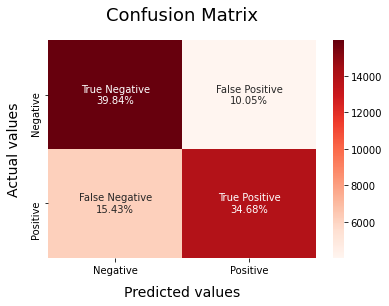

In [ ]:

y_pred = mnb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,  digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '', xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


In [ ]:
y_pred_nb = mnb_model.predict(test_vectors)
test_cases["MNB_PRED"] = y_pred_nb 

***Linear*** ***SVM***

In [ ]:
svm = LinearSVC()
svm_model=svm.fit(X_train, y_train) 

acc_train=svm_model.score(X_train, y_train)
acc_test=svm_model.score(X_test, y_test)
cvs_svm = cross_val_score(svm_model, X, y, cv=5) 

print("Accuracy of SVM_Model with Cross Validation is:",cvs_svm.mean() * 100)
print('Accuracy of SVM Model on training data : {}'.format(acc_train*100))
print('Accuracy of SVM Model on testing data : {} \n'.format(acc_test*100))


Accuracy of SVM_Model with Cross Validation is: 75.65899999999999
Accuracy of SVM Model on training data : 92.638125
Accuracy of SVM Model on testing data : 75.6925 



              precision    recall  f1-score   support

           0    0.76836   0.73413   0.75085     19957
           1    0.74651   0.77962   0.76271     20043

    accuracy                        0.75692     40000
   macro avg    0.75743   0.75688   0.75678     40000
weighted avg    0.75741   0.75692   0.75679     40000



Text(0.5, 1.0, 'Confusion Matrix')

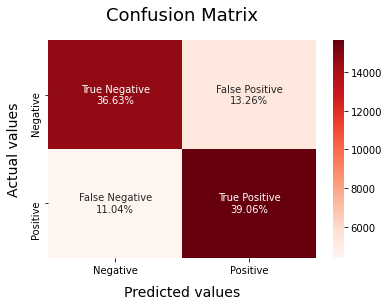

In [ ]:

y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,  digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '', xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


In [ ]:
y_pred_svm = svm_model.predict(test_vectors)
test_cases["SVM_model"] = y_pred_svm 

***Perceptron***

In [ ]:

Per = Perceptron()
p_model = Per.fit(X_train, y_train)
acc_train=p_model.score(X_train, y_train)
acc_test=p_model.score(X_test, y_test)
cvs_p = cross_val_score(p_model, X, y, cv=5) 

print("Accuracy of p_Model with Cross Validation is:",cvs_p.mean() * 100)
print('Accuracy of Perceptron Model on training data : {}'.format(acc_train*100))
print('Accuracy of Perceptron Model on testing data : {} \n'.format(acc_test*100))


Accuracy of p_Model with Cross Validation is: 70.4035
Accuracy of Perceptron Model on training data : 90.48625
Accuracy of Perceptron Model on testing data : 70.2825 



              precision    recall  f1-score   support

           0    0.69857   0.71128   0.70487     19957
           1    0.70722   0.69441   0.70075     20043

    accuracy                        0.70283     40000
   macro avg    0.70289   0.70284   0.70281     40000
weighted avg    0.70290   0.70283   0.70281     40000



Text(0.5, 1.0, 'Confusion Matrix')

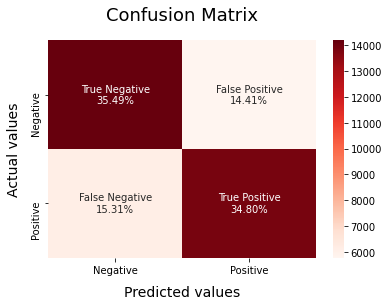

In [ ]:

y_pred = p_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,  digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Positive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '', xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


In [ ]:
y_pred_perceptron = p_model.predict(test_vectors)
test_cases["Perceptron_model"] = y_pred_perceptron

In [ ]:
xyz = test_cases[["text_processed","LR_PRED","RF_PRED","MNB_PRED","SVM_model","Perceptron_model"]]
xyz.head(5) 

,text_processed,LR_PRED,RF_PRED,MNB_PRED,SVM_model,Perceptron_model
0,aww farrah pass away,0,0,0,0,0
1,fund would get runaway beach daysi need,1,1,1,1,1
2,rest peace farrah,0,1,0,0,0
3,maialee changeforiran tweet thankfully worried,0,0,0,0,0
4,silkdark dont know get yell summer program app...,0,0,0,0,0


In [ ]:
xyz.to_csv('answers.csv',index = False )

***Further*** ***Analysis*** 

In [ ]:
def hashtag_Pattern(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags 


In [ ]:
data["text_lower"] = data["text"].str.lower()
HT_Negative = hashtag_Pattern(data["text_lower"][data['polarity'] == 0])
HT_Positive = hashtag_Pattern(data["text_lower"][data['polarity'] == 1])

# unnesting list
HT_Positive = sum(HT_Positive,[])
HT_Negative = sum(HT_Negative,[])

HT_Negative = [x for x in HT_Negative if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]

HT_Positive = [x for x in HT_Positive if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]


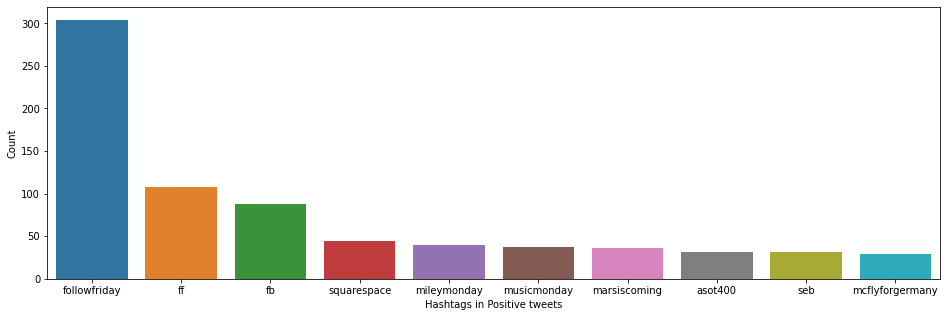

In [ ]:

a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in Positive tweets') 
plt.show()


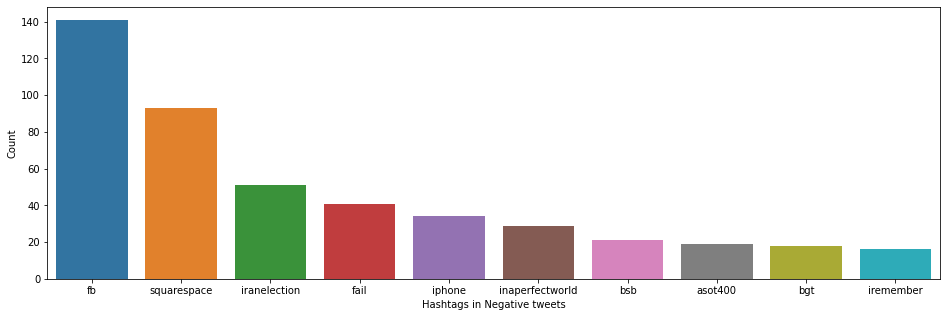

In [ ]:

b = nltk.FreqDist(HT_Negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Hashtags in Negative tweets') 
plt.show() 


In [ ]:

! pip install text2emotion
import text2emotion as te 


     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 133kB 21.1MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#data 
df_list = data['text_processed'].values.tolist()
lis = []   
for i in range(0,len(df_list)) :
  txt = df_list[i] 
  Tv = te.get_emotion(txt)
  Keymax = max(Tv, key= lambda x: Tv[x])
  lis.append(Keymax)       
  

In [ ]:
data['Emotion'] = lis
data.head() 

,polarity,id,date,query,user,text,word count,text_processed,text_lower,Emotion
0,1,1880738760,Fri May 22 02:19:34 PDT 2009,NO_QUERY,sueleeBAYbee,Gogol bordello was awesome. really nice night,7,gogol bordello awesome really nice night,gogol bordello was awesome. really nice night,Surprise
1,0,2214675791,Wed Jun 17 17:04:38 PDT 2009,NO_QUERY,honeybc3,@Kaiser_Steele my dh hasnt taken me to a hotel...,12,kaisersteele dh hasnt take hotel 7 year,@kaiser_steele my dh hasnt taken me to a hotel...,Happy
2,0,1963371516,Fri May 29 12:37:21 PDT 2009,NO_QUERY,leighalexander,@theECA i think that violates my noncompete,7,theeca think violate noncompete,@theeca i think that violates my noncompete,Surprise
3,1,1573734826,Tue Apr 21 02:36:16 PDT 2009,NO_QUERY,keza34,@fudgecrumpet what type of cake ?can i have so...,9,fudgecrumpet type cake somelol,@fudgecrumpet what type of cake ?can i have so...,Fear
4,0,1971772884,Sat May 30 07:51:57 PDT 2009,NO_QUERY,Alyson_Stoner,Can't wait for Camp Rock 2. Hope to see all my...,19,cant wait camp rock 2 hope see friend soon mis...,can't wait for camp rock 2. hope to see all my...,Fear


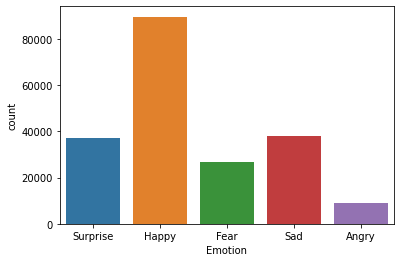

In [ ]:
sns.countplot(x = 'Emotion', data = data) 

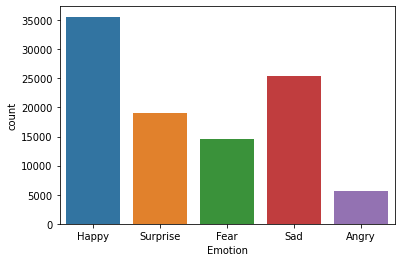

In [ ]:
sns.countplot(x = 'Emotion', data = data[data['polarity'] == 0]) 
 

(array([1, 0, 0, ..., 0, 0, 0]),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3f95e09fd0>)

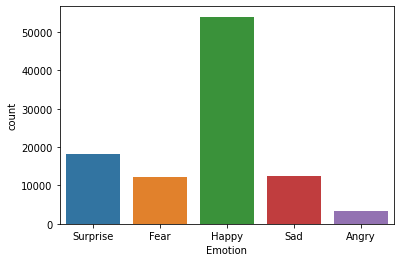

In [ ]:
y, sns.countplot(x = 'Emotion', data = data[data['polarity'] == 1]) 

Emotion vs Hashtag plots

In [ ]:

HT_Sad = hashtag_Pattern(data["text_lower"][data['Emotion'] == 'Sad'])
HT_Happy = hashtag_Pattern(data["text_lower"][data['Emotion'] == 'Happy'])
HT_Angry = hashtag_Pattern(data["text_lower"][data['Emotion'] == 'Angry'])
HT_Surprise = hashtag_Pattern(data["text_lower"][data['Emotion'] == 'Surprise'])
HT_Fear = hashtag_Pattern(data["text_lower"][data['Emotion'] == 'Fear'])
# unnesting list
HT_Sad = sum(HT_Sad,[])
HT_Happy = sum(HT_Happy,[])
HT_Angry = sum(HT_Angry,[])
HT_Surprise = sum(HT_Surprise,[])
HT_Fear = sum(HT_Fear,[])

HT_Sad = [x for x in HT_Sad if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]

HT_Happy = [x for x in HT_Happy if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]

HT_Angry = [x for x in HT_Angry if not (x.isdigit()  or x[0] == '-' and x[1:].isdigit())]

HT_Surprise = [x for x in HT_Surprise if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]

HT_Fear = [x for x in HT_Fear if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())] 
                                                                                                                      

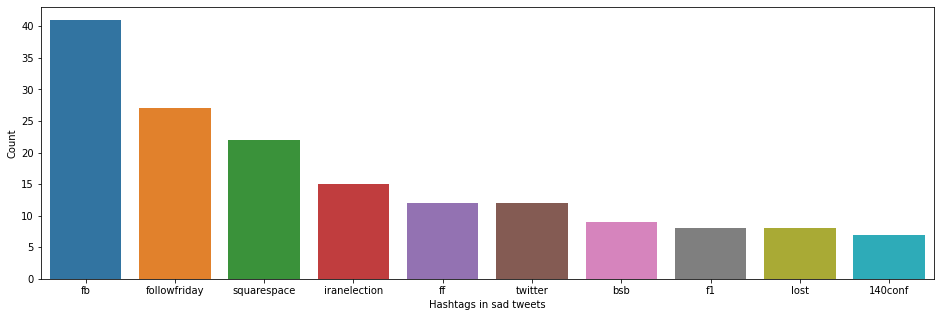

In [ ]:

a = nltk.FreqDist(HT_Sad)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in sad tweets') 
plt.show()


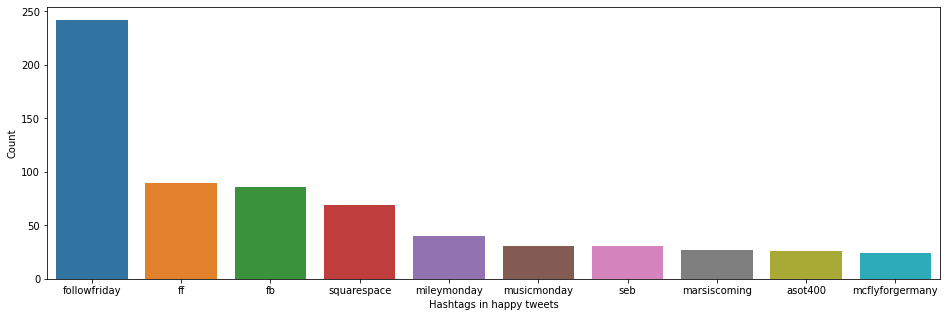

In [ ]:

a = nltk.FreqDist(HT_Happy)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in happy tweets') 
plt.show()

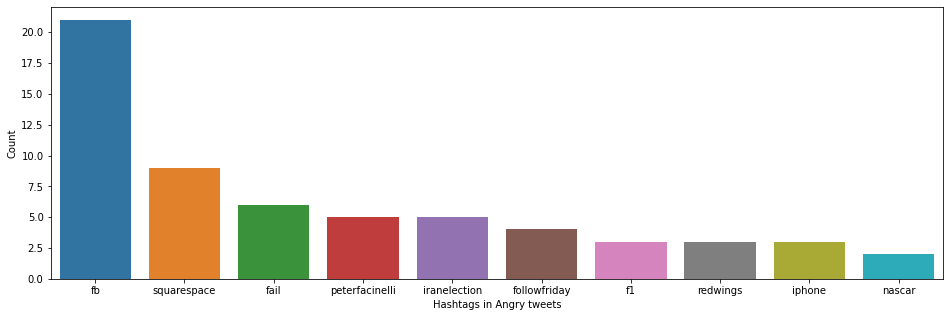

In [ ]:

a = nltk.FreqDist(HT_Angry)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in Angry tweets') 
plt.show()


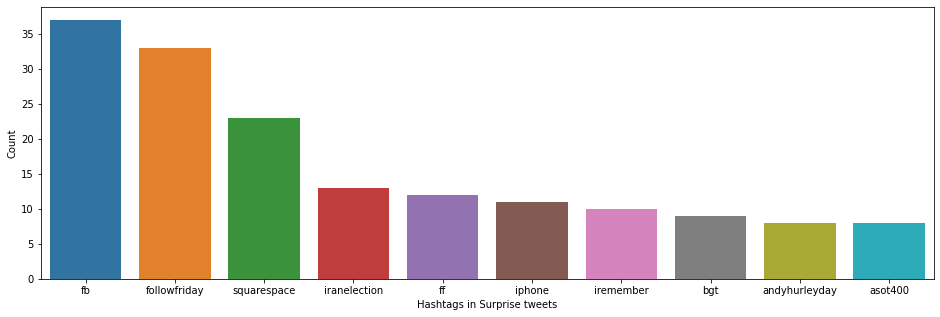

In [ ]:

a = nltk.FreqDist(HT_Surprise)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in Surprise tweets') 
plt.show()


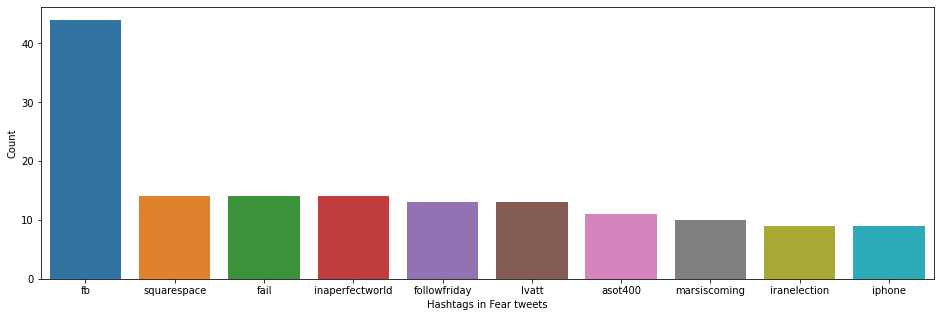

In [ ]:

a = nltk.FreqDist(HT_Fear)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
ax.set(xlabel = 'Hashtags in Fear tweets') 
plt.show()
